In [25]:
# 05_Visualization.ipynb
# cumulative equity curve, monthly returns, rolling Sharpe ratios
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Load saved results ---
cumulative = pd.read_pickle("../data/processed/backtest_cumulative.pkl")
results = pd.read_pickle("../data/processed/backtest_returns.pkl")
prices = pd.read_pickle("../data/processed/prices.pkl")

print("Cumulative shape:", cumulative.shape)
print("Returns shape:", results.shape)
print("Prices shape:", prices.shape)

Cumulative shape: (23, 2)
Returns shape: (23, 2)
Prices shape: (2516, 5)


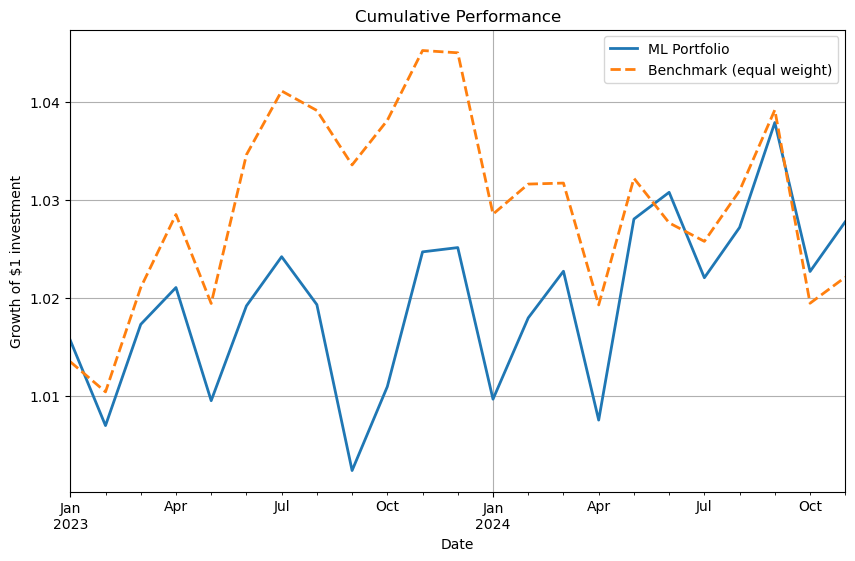

In [26]:
# --- Plot equity curve: ML portfolio vs Benchmark ---
plt.figure(figsize=(10,6))

if 'ML_Portfolio' in cumulative.columns:
    cumulative['ML_Portfolio'].plot(label="ML Portfolio", lw=2)
else:
    print("Warning: 'ML_Portfolio' column not found in cumulative. Available columns:", cumulative.columns)

if 'Benchmark' in cumulative.columns:
    cumulative['Benchmark'].plot(label="Benchmark (equal weight)", lw=2, linestyle="--")
else:
    print("Warning: 'Benchmark' column not found in cumulative. Available columns:", cumulative.columns)

plt.title("Cumulative Performance")
plt.ylabel("Growth of $1 investment")
plt.legend()
plt.grid(True)
plt.show()

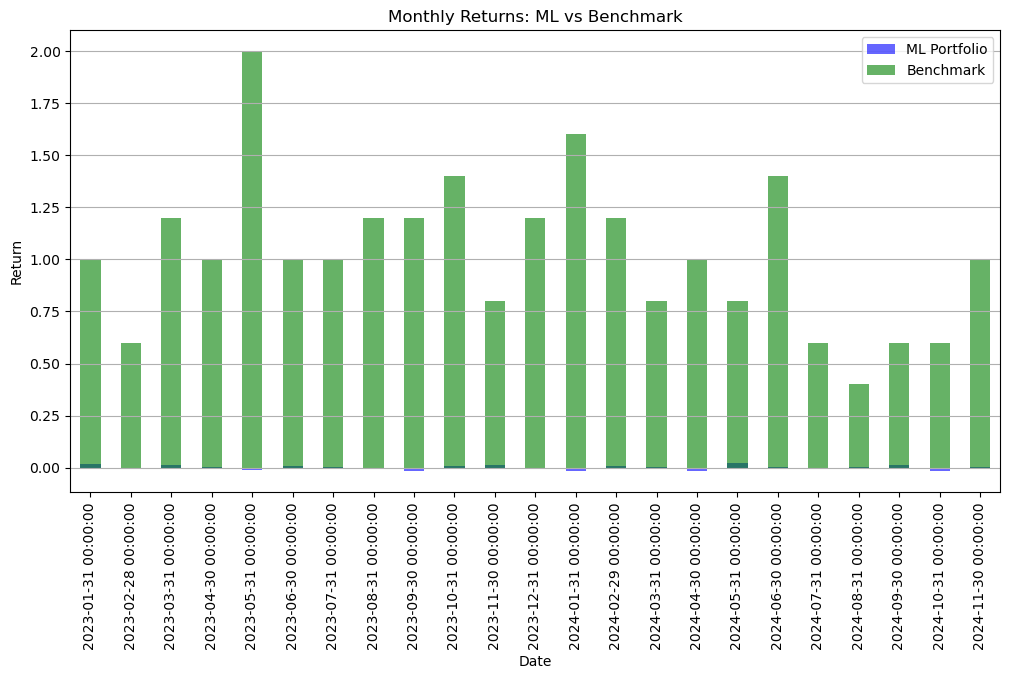

In [29]:
# --- 3. Plot monthly returns comparison ---
plt.figure(figsize=(12,6))

if 'ML_Portfolio' in results.columns:
    results['ML_Portfolio'].plot(kind='bar', alpha=0.6, color='b', label="ML Portfolio")
if 'Benchmark' in results.columns:
    results['Benchmark'].plot(kind='bar', alpha=0.6, color='g', label="Benchmark")

plt.title("Monthly Returns: ML vs Benchmark")
plt.ylabel("Return")
plt.legend()
plt.grid(True, axis="y")
plt.show()

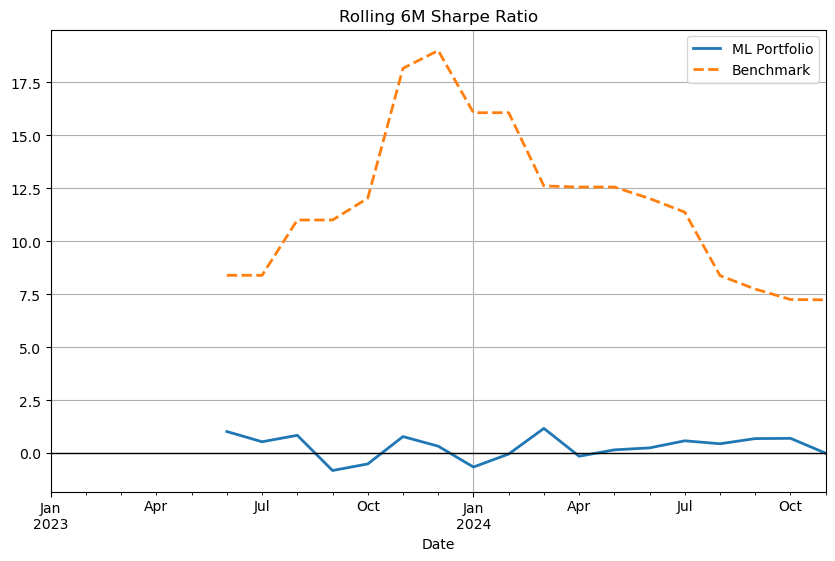

In [28]:
# --- Rolling Sharpe ratio (6-month risk-adjusted return) ---
def rolling_sharpe(returns, window=6):
    """
    Compute rolling annualized Sharpe ratio.
    
    Parameters
    ----------
    returns : pd.Series
        Monthly portfolio returns.
    window : int
        Rolling window in months.
    
    Returns
    -------
    pd.Series
        Rolling Sharpe ratio.
    """
    return (returns.rolling(window).mean() /
            returns.rolling(window).std()) * (12**0.5)  # annualized

# Compute rolling Sharpe for ML portfolio and benchmark
sharpe_ml = rolling_sharpe(results['ML_Portfolio'])
sharpe_bench = rolling_sharpe(results['Benchmark'])

# Plot rolling Sharpe ratios
plt.figure(figsize=(10,6))
sharpe_ml.plot(label="ML Portfolio", lw=2)
sharpe_bench.plot(label="Benchmark", lw=2, linestyle="--")
plt.title("Rolling 6M Sharpe Ratio")
plt.axhline(0, color="black", lw=1)
plt.legend()
plt.grid(True)
plt.show()
